### Recap

We have our random forest model with tuned parameters and some minor feature engineering. Time to review the model to look for interesting insights for the upcoming presentation and run our final validation.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import stackoverflow_helper as soh
import dictionaries as look

In [2]:
raw_import = pd.read_csv('/Users/pang/repos/stack-overflow-survey/_data/output_ft.csv', index_col='Respondent')

In [3]:
y_big = raw_import['JobSat']
X_big = raw_import.drop(columns='JobSat')
X_train_big, X_test_final, y_train_big, y_test_final = train_test_split(
    X_big, y_big, test_size=0.20, random_state=4444)

y = y_train_big
X = X_train_big
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4444)
df = pd.DataFrame(y_train).merge(X_train, on='Respondent')
df_te = pd.DataFrame(y_test).merge(X_test, on='Respondent')

### Final validation

And as a reminder, here is the baseline from previous notebooks.

In [4]:
soh.test_model(X_train, y_train, X_test, y_test)

{'roc_auc': 0.749966948211678,
 'accuracy': 0.7036347499152458,
 'precision': 0.6974637081415885,
 'recall': 0.9653705900250014,
 'f1': 0.8125139643019654}

In [5]:
soh.test_model(X_train, y_train, X_test_final, y_test_final)

{'roc_auc': 0.7439886238651707,
 'accuracy': 0.7023734913947882,
 'precision': 0.6983887267980966,
 'recall': 0.9664190147126481,
 'f1': 0.8124469276315549}

In [6]:
soh.test_model(X_train_big, y_train_big, X_test_final, y_test_final)

{'roc_auc': 0.7436540556707055,
 'accuracy': 0.7000185016475952,
 'precision': 0.6971519901353168,
 'recall': 0.9723133690743332,
 'f1': 0.8115559566679513}

The numbers look ok, so the model is good enough for insight analysis.

### Looking for insights

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=35, max_depth=7, min_samples_leaf=23, criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=23, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=35,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

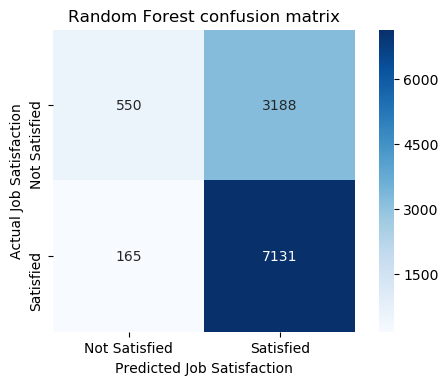

In [9]:
confusion = confusion_matrix(y_test_final, rfc.predict(X_test_final))
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, fmt='d', square=True,
           xticklabels=['Not Satisfied', 'Satisfied'],
           yticklabels=['Not Satisfied', 'Satisfied'])

plt.xlabel('Predicted Job Satisfaction')
plt.ylabel('Actual Job Satisfaction')
plt.title('Random Forest confusion matrix');

The model is missing a large chunk of employees who report dissatisfaction with thier job, but is particularly good at finding employees who report job satisfaction. The below implementation with a raised threshold can increase the number of accurate predictions.

In [10]:
from ipywidgets import interactive, FloatSlider


def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Satisfied', 'Satisfied'],
           yticklabels=['Not Satisfied', 'Satisfied'])

    plt.xlabel('Predicted Job Satisfaction')
    plt.ylabel('Actual Job Satisfaction')
    plt.title('Random Forest confusion matrix');

interactive(lambda threshold: make_confusion_matrix(rfc, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [11]:
rfc.predict_proba(X_test)[:,1] >= .64

array([ True,  True,  True, ...,  True,  True,  True])